# EDA

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
import joblib
import math


In [105]:
df = pd.read_csv("online_gaming_insights.csv")
df_raw = pd.read_csv("online_gaming_insights.csv")


In [106]:
# Lima baris pertama
df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


In [107]:
print("Bentuk dataset:", df.shape)
print("\nNama kolom: ", df.columns.tolist())
print("\nTipe data:")
print(df.dtypes)

Bentuk dataset: (40034, 13)

Nama kolom:  ['PlayerID', 'Age', 'Gender', 'Location', 'GameGenre', 'PlayTimeHours', 'InGamePurchases', 'GameDifficulty', 'SessionsPerWeek', 'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked', 'EngagementLevel']

Tipe data:
PlayerID                       int64
Age                            int64
Gender                        object
Location                      object
GameGenre                     object
PlayTimeHours                float64
InGamePurchases                int64
GameDifficulty                object
SessionsPerWeek                int64
AvgSessionDurationMinutes      int64
PlayerLevel                    int64
AchievementsUnlocked           int64
EngagementLevel               object
dtype: object


In [108]:
print("Info Data:")
df.info()

Info Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)


In [109]:
# Lima Baris Terakhir
df.tail()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
40029,49029,32,Male,USA,Strategy,20.619662,0,Easy,4,75,85,14,Medium
40030,49030,44,Female,Other,Simulation,13.539280,0,Hard,19,114,71,27,High
40031,49031,15,Female,USA,RPG,0.240057,1,Easy,10,176,29,1,High
40032,49032,34,Male,USA,Sports,14.017818,1,Medium,3,128,70,10,Medium
40033,49033,19,Male,USA,Sports,10.083804,0,Easy,13,84,72,39,Medium


In [110]:
# Ringkasan Statistik
df.describe()

,PlayerID,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
count,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000
mean,29016.500000,31.992531,12.024365,0.200854,9.471774,94.792252,49.655568,24.526477
std,11556.964675,10.043227,6.914638,0.400644,5.763667,49.011375,28.588379,14.430726
min,9000.000000,15.000000,0.000115,0.000000,0.000000,10.000000,1.000000,0.000000
25%,19008.250000,23.000000,6.067501,0.000000,4.000000,52.000000,25.000000,12.000000
50%,29016.500000,32.000000,12.008002,0.000000,9.000000,95.000000,49.000000,25.000000
75%,39024.750000,41.000000,17.963831,0.000000,14.000000,137.000000,74.000000,37.000000
max,49033.000000,49.000000,23.999592,1.000000,19.000000,179.000000,99.000000,49.000000


In [111]:
# Analisis Fitur Kategorikal

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())




Gender:
Gender
Male      23959
Female    16075
Name: count, dtype: int64

Location:
Location
USA       16000
Europe    12004
Asia       8095
Other      3935
Name: count, dtype: int64

GameGenre:
GameGenre
Sports        8048
Action        8039
Strategy      8012
Simulation    7983
RPG           7952
Name: count, dtype: int64

GameDifficulty:
GameDifficulty
Easy      20015
Medium    12011
Hard       8008
Name: count, dtype: int64

EngagementLevel:
EngagementLevel
Medium    19374
High      10336
Low       10324
Name: count, dtype: int64


In [112]:
# Cek Missing Values
print("Missing Values per Masing-Masing Kolom:")
print(f"\n{df.isnull().sum()}")  

print("\nTotal Missing Values:", df.isnull().sum().sum())

Missing Values per Masing-Masing Kolom:

PlayerID                     0
Age                          0
Gender                       0
Location                     0
GameGenre                    0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
dtype: int64

Total Missing Values: 0


In [113]:
# Cek Duplicated Rows

print("Duplicated Rows:")
print(f"\n{df.duplicated().sum()}")  

print("\nTotal Duplicated Rows:", df.duplicated().sum().sum())  

Duplicated Rows:

0

Total Duplicated Rows: 0


In [114]:
# Cek Outlier + tampilkan Q1, Q2, Q3

numeric_cols = [
    "Age", "PlayTimeHours", "InGamePurchases",
    "SessionsPerWeek", "AvgSessionDurationMinutes",
    "PlayerLevel", "AchievementsUnlocked"
]

summary = []
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q2 = df[col].quantile(0.50)  # median
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    mask = (df[col] < lower) | (df[col] > upper)
    outlier_count = mask.sum()
    outlier_pct = outlier_count / len(df) * 100

    summary.append({
        "Column": col,
        "Q1": Q1,
        "Q2 (Median)": Q2,
        "Q3": Q3,
        "IQR": IQR,
        "Lower Fence": lower,
        "Upper Fence": upper,
        "Outliers (count)": outlier_count,
        "Outliers (%)": outlier_pct
    })

outlier_summary = pd.DataFrame(summary).sort_values("Outliers (count)", ascending=False)
outlier_summary


,Column,Q1,Q2 (Median),Q3,IQR,Lower Fence,Upper Fence,Outliers (count),Outliers (%)
2,InGamePurchases,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8041,20.085427
0,Age,23.000000,32.000000,41.000000,18.000000,-4.000000,68.000000,0,0.000000
1,PlayTimeHours,6.067501,12.008002,17.963831,11.896331,-11.776995,35.808327,0,0.000000
3,SessionsPerWeek,4.000000,9.000000,14.000000,10.000000,-11.000000,29.000000,0,0.000000
4,AvgSessionDurationMinutes,52.000000,95.000000,137.000000,85.000000,-75.500000,264.500000,0,0.000000
5,PlayerLevel,25.000000,49.000000,74.000000,49.000000,-48.500000,147.500000,0,0.000000
6,AchievementsUnlocked,12.000000,25.000000,37.000000,25.000000,-25.500000,74.500000,0,0.000000


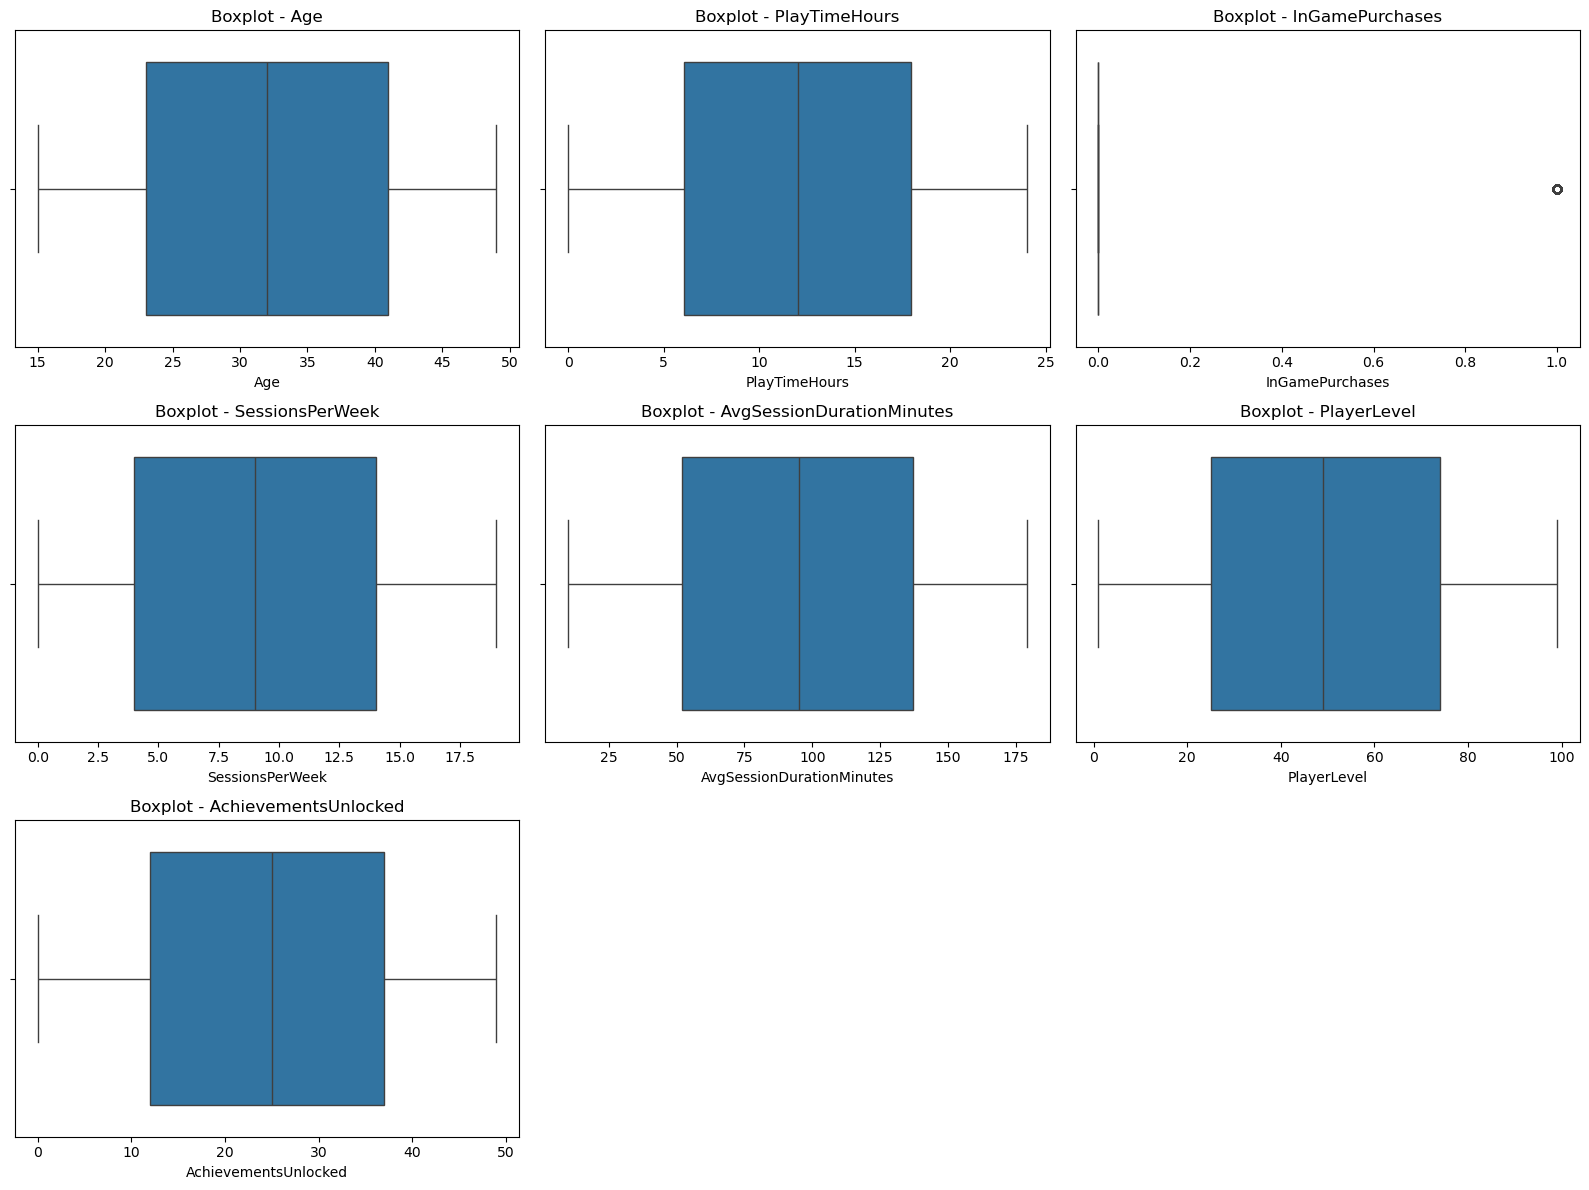

In [115]:
cols = numeric_cols
ncols = 3
nrows = math.ceil(len(cols) / ncols)

plt.figure(figsize=(16, 4*nrows))
for i, col in enumerate(cols, 1):
    plt.subplot(nrows, ncols, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot - {col}")
plt.tight_layout()
plt.show()

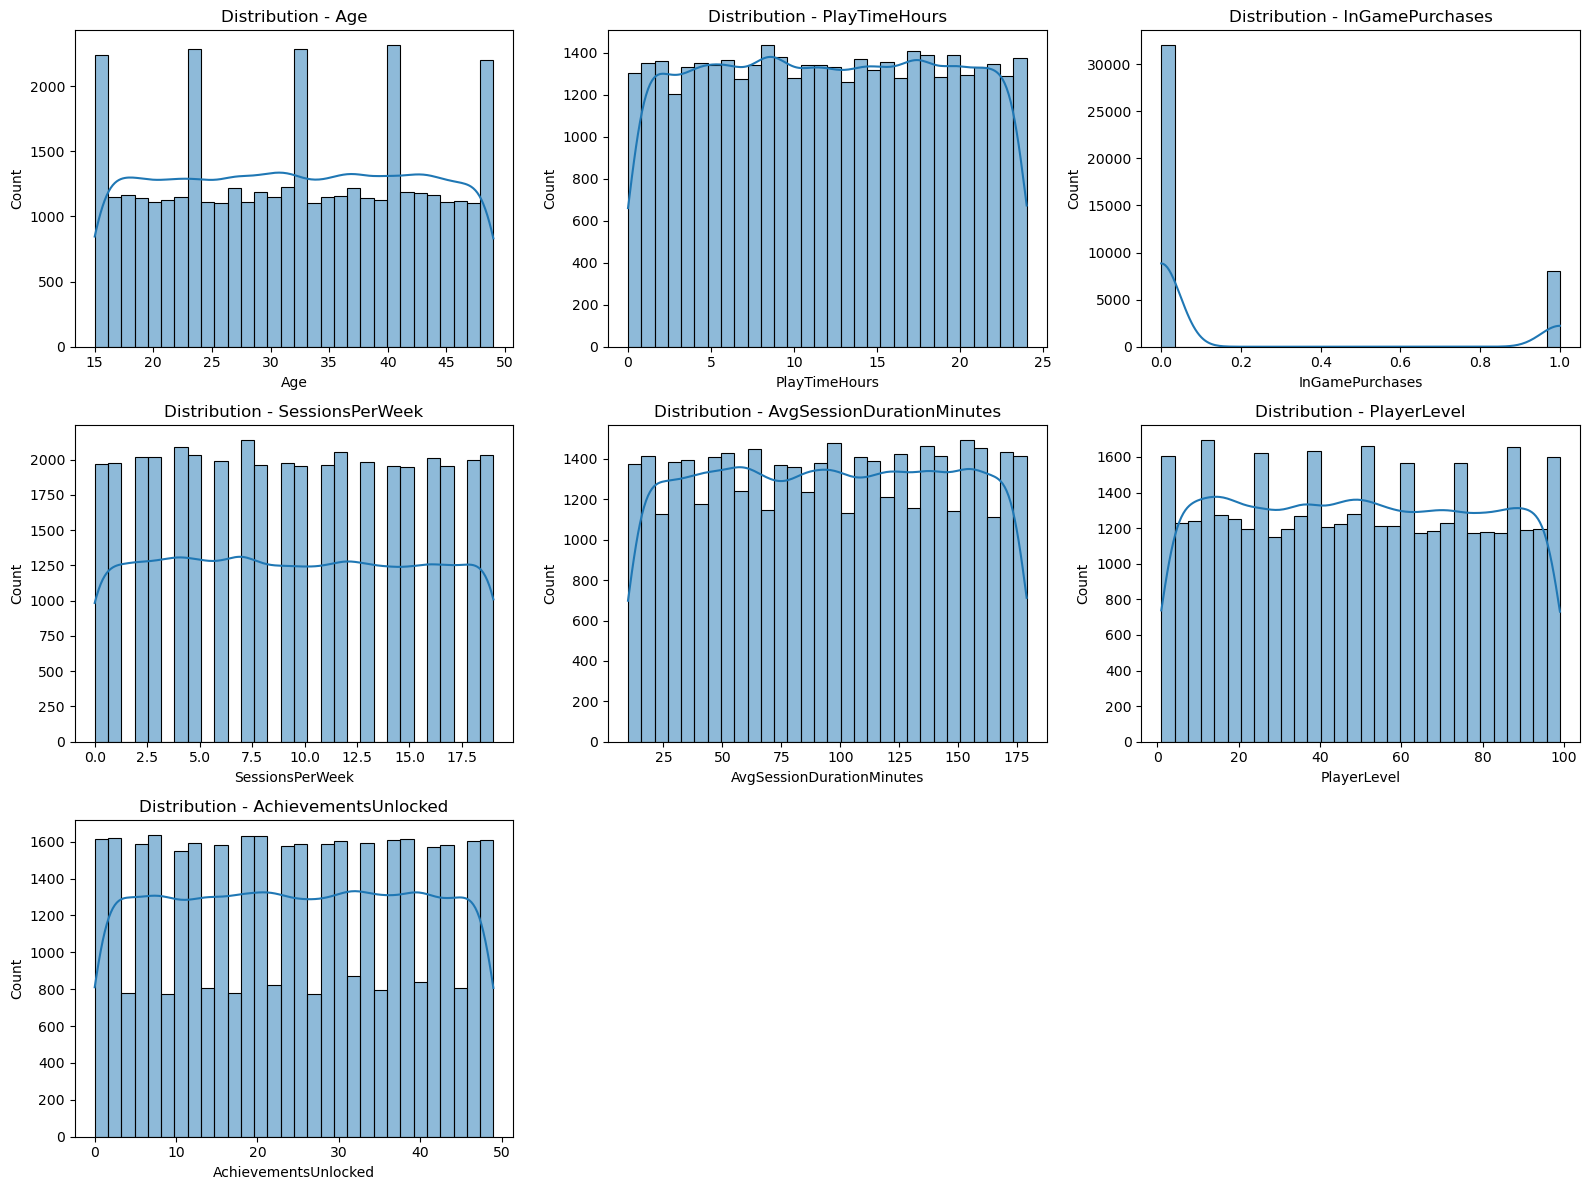

In [116]:
plt.figure(figsize=(16, 4*nrows))
for i, col in enumerate(cols, 1):
    plt.subplot(nrows, ncols, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution - {col}")
plt.tight_layout()
plt.show()


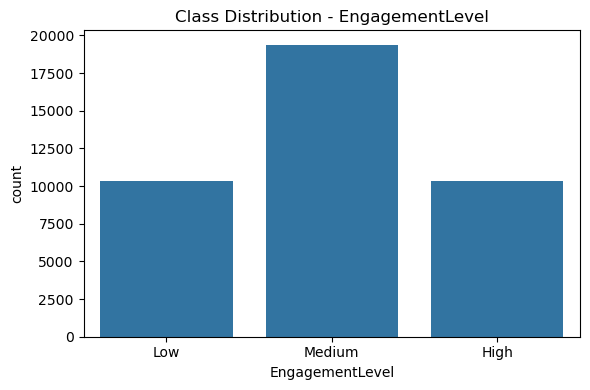

In [117]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="EngagementLevel", order=["Low","Medium","High"])
plt.title("Class Distribution - EngagementLevel")
plt.tight_layout()
plt.show()

# Pre-processing

In [119]:
# Menghapus kolom yang tidak diperlukan
df.drop(columns=["PlayerID"], inplace=True)

In [120]:
df.columns = df.columns.str.strip()

# One-Hot Encoding 
df = pd.get_dummies(df, columns=["Gender", "Location", "GameGenre"], drop_first=False)

# Ordinal Encoding
difficulty_map = {"Easy": 0, "Medium": 1, "Hard": 2}
df["GameDifficulty"] = df["GameDifficulty"].map(difficulty_map)

engagement_map = {"Low": 0, "Medium": 1, "High": 2}
df["EngagementLevel"] = df["EngagementLevel"].map(engagement_map)

# Hasil Encoding
print(df.head())


   Age  PlayTimeHours  InGamePurchases  GameDifficulty  SessionsPerWeek  \
0   43      16.271119                0               1                6   
1   29       5.525961                0               1                5   
2   22       8.223755                0               0               16   
3   35       5.265351                1               0                9   
4   33      15.531945                0               1                2   

   AvgSessionDurationMinutes  PlayerLevel  AchievementsUnlocked  \
0                        108           79                    25   
1                        144           11                    10   
2                        142           35                    41   
3                         85           57                    47   
4                        131           95                    37   

   EngagementLevel  Gender_Female  Gender_Male  Location_Asia  \
0                1          False         True          False   
1               

Training Process

In [121]:
# Pisahkan fitur dan target
X = df.drop(columns=["EngagementLevel"])
y = df["EngagementLevel"]

# Split data menjadi train dan test (80:20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Normalisasi fitur numerik (karena skala berbeda-beda)
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

num_cols = ["Age", "PlayTimeHours", "InGamePurchases", "SessionsPerWeek",
            "AvgSessionDurationMinutes", "PlayerLevel", "AchievementsUnlocked"]

X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])

In [122]:
# Definisi model yang ingin diuji
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=250, class_weight="balanced"),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=10, n_jobs=-1),
    'XGBoost': XGBClassifier(
        n_estimators=200,
        max_depth=5,
        learning_rate=0.1,
        objective="multi:softmax",
        num_class=3,
        eval_metric="mlogloss",
        random_state=42
    )
}

results = []
trained_models = {}

for name, model in models.items():
    print("=" * 50)
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train)
    trained_models[name] = model

    # Evaluasi pada train dan test set
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)

    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)

    print(f"{name} Training Accuracy: {train_acc:.4f}")
    print(f"{name} Testing Accuracy: {test_acc:.4f}\n")
    print("Classification Report:")
    print(classification_report(y_test, y_pred_test))

    # Simpan hasil ke dataframe
    results.append({
        "Model": name,
        "Train Accuracy": train_acc,
        "Test Accuracy": test_acc
    })

Training Logistic Regression...
Logistic Regression Training Accuracy: 0.8233
Logistic Regression Testing Accuracy: 0.8262

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.70      0.75      2065
           1       0.80      0.89      0.84      3875
           2       0.91      0.83      0.87      2067

    accuracy                           0.83      8007
   macro avg       0.84      0.81      0.82      8007
weighted avg       0.83      0.83      0.82      8007

Training Random Forest...
Random Forest Training Accuracy: 1.0000
Random Forest Testing Accuracy: 0.9112

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      2065
           1       0.90      0.95      0.92      3875
           2       0.92      0.87      0.90      2067

    accuracy                           0.91      8007
   macro avg       0.91      0.90      0.91      8007
weighted avg     

<Figure size 600x500 with 0 Axes>

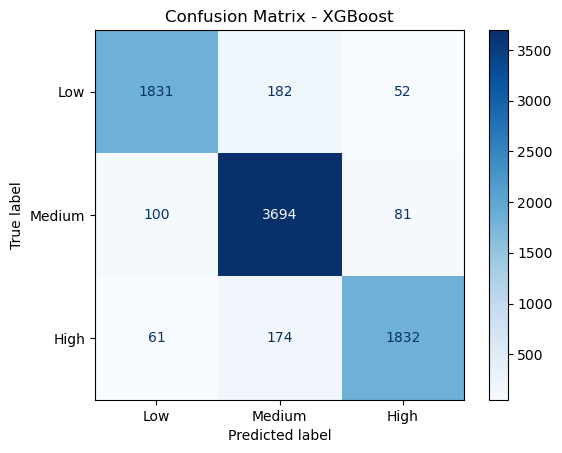

C:\Users\ROG\AppData\Local\Temp\ipykernel_33948\1982629.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


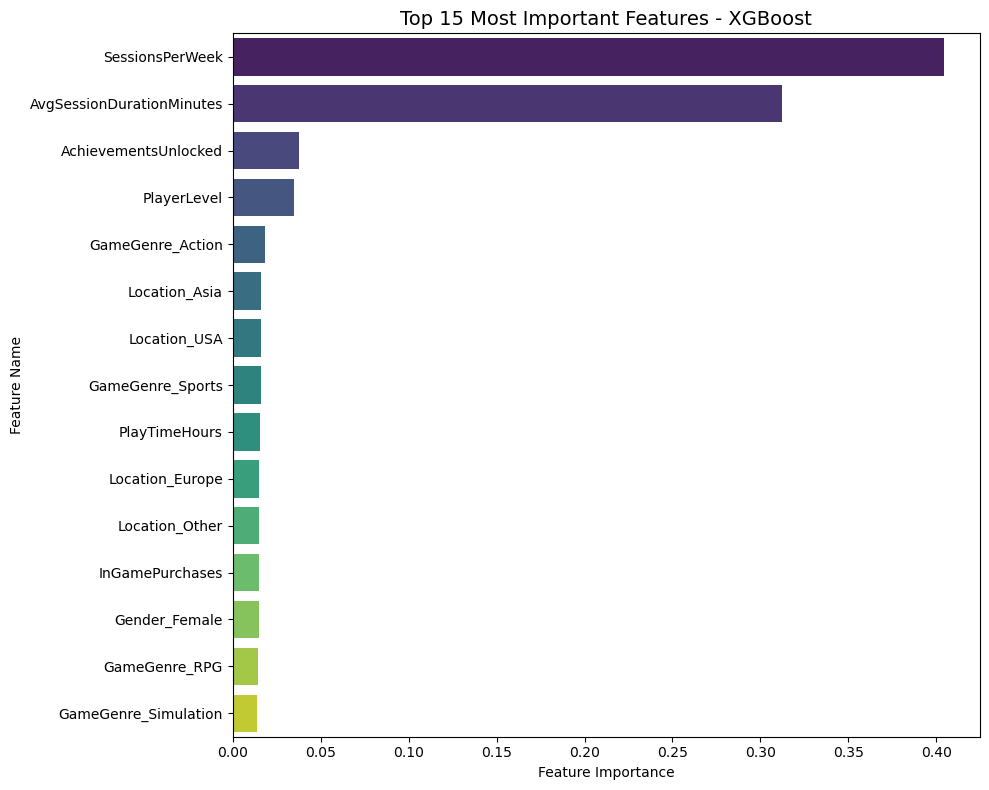

Top 10 Most Important Features:
1. SessionsPerWeek: 0.4046
2. AvgSessionDurationMinutes: 0.3123
3. AchievementsUnlocked: 0.0375
4. PlayerLevel: 0.0349
5. GameGenre_Action: 0.0187
6. Location_Asia: 0.0161
7. Location_USA: 0.0159
8. GameGenre_Sports: 0.0158
9. PlayTimeHours: 0.0155
10. Location_Europe: 0.0152


In [123]:
# Ambil model terbaik
best_model = trained_models["XGBoost"]

# Prediksi pada test set
y_pred = best_model.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Low", "Medium", "High"])

plt.figure(figsize=(6, 5))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix - XGBoost")
plt.show()


importances = best_model.feature_importances_
feature_names = X.columns

# Buat DataFrame dan urutkan descending
feat_imp = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)  # urutkan dari paling penting ke paling rendah

# Plot horizontal bar chart (descending)
plt.figure(figsize=(10, 8))
sns.barplot(
    data=feat_imp.head(15),  # ambil 15 fitur teratas
    x="Importance",
    y="Feature",
    palette="viridis"
)
plt.title("Top 15 Most Important Features - XGBoost", fontsize=14)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.tight_layout()
plt.show()

# Tampilkan 10 fitur teratas secara numerik
print("Top 10 Most Important Features:")
for i, (feat, imp) in enumerate(feat_imp.head(10).values):
    print(f"{i+1}. {feat}: {imp:.4f}")

In [124]:
#Cross-validate one last time
scores = cross_val_score(trained_models['XGBoost'], X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation Accuracy: {np.mean(scores):.4f} ± {np.std(scores):.4f}")


Cross-validation Accuracy: 0.9142 ± 0.0020


In [125]:
#Save model
joblib.dump(trained_models['XGBoost'], 'xgboost_best_model.pkl')

['xgboost_best_model.pkl']